# **Packages' Import**

In [1]:
import pandas            as pd                                   # Library for Read/Write IO File (CSV, Excel, TXT, JSON, etc.)
import matplotlib.pyplot as plt                                  # Library for plotting and figures
from tensorflow.keras.models import Sequential                    # Importation of sequantial Model for LSTM
from tensorflow.keras.layers import LSTM,Dense                    # Importation of LSTM Units
from sklearn.metrics        import mean_squared_error            # Mean Squared Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_error           # Mean Absolute Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_percentage_error# MAPE for evaluation the percentage of error


# **Step 1 - Business & Data Understanding**

The goal of this step is to:
* identify the number of samples;
* identify the type of forecasting;
* study the stationarity of your time series.


In [2]:
df=pd.read_csv("..\data\AirPassengers.csv")        # Read dataset using read_csv(filepath) function
df.head()                                               # Display the first five rows

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


This dataset includes:
* 144 samples (12 years);
* Monthly Sampled - Long Term;
* the plot of the distribution of the time series is below. We notice that the staitonarity is covered withtin 15 values (Will be used as sequence length)

Text(0.5, 1.0, 'Distribution of the Number of Passenger over 12 years')

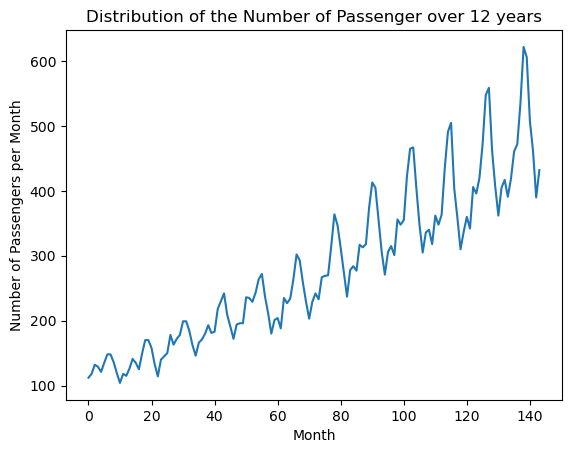

In [4]:
plt.xlabel("Month")
plt.ylabel("Number of Passengers per Month")
plt.plot(df["#Passengers"])
plt.title("Distribution of the Number of Passenger over 12 years")

# **Step 2 - Data preparation**

The goal of this step is to:
* Construct the X and Y where X denotes the matrix features and y is the label vector;
* Split dataset into training set and testing set: X_train,X_test,y_train,y_test.

## **2.2. Data Loading**

In [5]:
def load_data(data,seq_len):
  X=[]
  y=[]
  for i in range(seq_len,len(data)):
    X.append(data.iloc[i-seq_len:i,1])
    y.append(data.iloc[i,1])
  return X,y
X,y=load_data(df,25)

## **2.2. Data Split**

We split the dataset into 80% for train and 20% for test

In [6]:
train_size=len(y)*0.8
train_size=104

In [7]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

In [8]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_test=np.array(X_test)
X_train=X_train.reshape(104,25,1)
X_test=X_test.reshape(15,25,1)

# **Step 3- Machine Learning**

In [9]:
model=Sequential()
model.add(LSTM(20,input_shape=(25,1)))
model.add(Dense(100))
model.add(Dense(1))

D:\Users\henta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
52/52 - 5s - 106ms/step - loss: 91918.4297
Epoch 2/100
52/52 - 0s - 5ms/step - loss: 86187.2969
Epoch 3/100
52/52 - 0s - 5ms/step - loss: 69853.3984
Epoch 4/100
52/52 - 0s - 5ms/step - loss: 47478.6875
Epoch 5/100
52/52 - 0s - 5ms/step - loss: 27575.8086
Epoch 6/100
52/52 - 0s - 4ms/step - loss: 16110.5146
Epoch 7/100
52/52 - 0s - 5ms/step - loss: 11106.7861
Epoch 8/100
52/52 - 0s - 5ms/step - loss: 9422.6191
Epoch 9/100
52/52 - 0s - 5ms/step - loss: 8510.1348
Epoch 10/100
52/52 - 0s - 5ms/step - loss: 7627.7832
Epoch 11/100
52/52 - 0s - 5ms/step - loss: 6989.3491
Epoch 12/100
52/52 - 0s - 4ms/step - loss: 6110.0991
Epoch 13/100
52/52 - 0s - 4ms/step - loss: 5297.7422
Epoch 14/100
52/52 - 0s - 5ms/step - loss: 4888.7095
Epoch 15/100
52/52 - 0s - 4ms/step - loss: 4342.3975
Epoch 16/100
52/52 - 0s - 5ms/step - loss: 4031.7825
Epoch 17/100
52/52 - 0s - 5ms/step - loss: 3981.6150
Epoch 18/100
52/52 - 0s - 4ms/step - loss: 3536.4236
Epoch 19/100
52/52 - 0s - 4ms/step - loss: 299

# **Step 4- Performance Evaluation**

In [11]:
print(" **** Performance of LSTM *****")
y_pred_lstm=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred_lstm)
mae=mean_absolute_error(y_test,y_pred_lstm)
mape=mean_absolute_percentage_error(y_test,y_pred_lstm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)


 **** Performance of LSTM *****
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
MSE=  3567.248234790812
MAE=  45.550052897135416
MAPEE=  0.09306921295497521


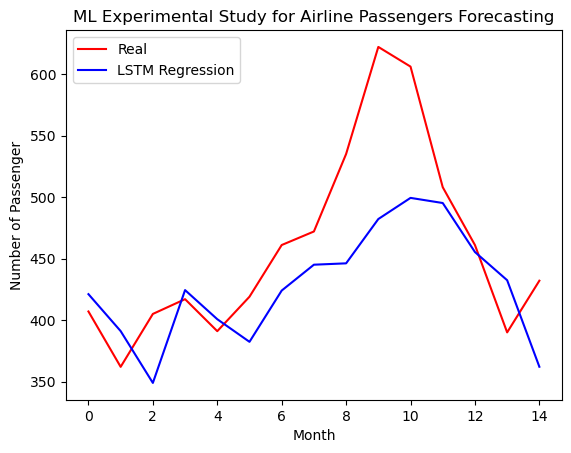

In [12]:
plt.xlabel("Month")
plt.ylabel("Number of Passenger")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lstm,color='blue',label='LSTM Regression')
plt.title("ML Experimental Study for Airline Passengers Forecasting")
plt.legend()